In [1]:
!pip install 'sagemaker>=2,<3'

In [2]:
%%time
import sagemaker
from sagemaker import get_execution_role
 
role = get_execution_role()
print(role)
sess = sagemaker.Session()

arn:aws:iam::059814354933:role/service-role/AmazonSageMaker-ExecutionRole-20210401T101139
CPU times: user 882 ms, sys: 170 ms, total: 1.05 s
Wall time: 6.49 s


In [3]:
bucket = sess.default_bucket()  
prefix = 'semantic-segmentation-demo'
print(bucket)

sagemaker-us-east-2-059814354933


In [4]:
training_image = sagemaker.image_uris.retrieve('semantic-segmentation', sess.boto_region_name)
print(training_image)

825641698319.dkr.ecr.us-east-2.amazonaws.com/semantic-segmentation:1


In [5]:
print(sess.boto_region_name)

us-east-2


In [88]:
import os
import shutil

# Create directory structure mimicing the s3 bucket where data is to be dumped.
data_dir = 'dataset'
os.makedirs('data/train', exist_ok=True)
os.makedirs('data/validation', exist_ok=True)
os.makedirs('data/train_annotation', exist_ok=True)
os.makedirs('data/validation_annotation', exist_ok=True)

# Move the jpg images in training list to train directory and png images to train_annotation directory.
for i in training_list:
    shutil.copy2(data_dir + '/JPEGImages/'+i+'.jpg', 'data/train/')
    shutil.copy2(data_dir + '/SegmentationClassPNG/'+i+'.png','data/train_annotation/' )

# Move the jpg images in validation list to validation directory and png images to validation_annotation directory.
for i in validation_list:
    shutil.copy2(data_dir+'/JPEGImages/'+i+'.jpg', 'data/validation/')
    shutil.copy2(data_dir+'/SegmentationClassPNG/'+i+'.png','data/validation_annotation/' )

In [13]:
pwd

'/home/ec2-user/SageMaker/AWS-segmentation'

In [22]:
cd ..

/home/ec2-user/SageMaker/AWS-segmentation


In [23]:
pwd

'/home/ec2-user/SageMaker/AWS-segmentation'

In [24]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '__MACOSX',
 'requirements.txt',
 'dataset',
 'README.md',
 'voc.py',
 'labelsFinishedDonouts.txt',
 'Untitled.ipynb',
 'Dataset',
 '.gitattributes',
 'data']

In [8]:
import os

In [9]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '__MACOSX',
 'requirements.txt',
 'dataset',
 'README.md',
 'voc.py',
 'labelsFinishedDonouts.txt',
 'Untitled.ipynb',
 '.gitattributes',
 'data']

In [58]:
cd dataset/JPEGImages

/home/ec2-user/SageMaker/AWS-segmentation/dataset/JPEGImages


In [59]:
x = os.listdir()

In [60]:
len(x)

2005

In [61]:
x.sort()

In [62]:
train_list = []

for i in x:
    if i.split('.')[-1] == 'jpg':
        train_list.append(i)

In [63]:
len(train_list)

2005

In [64]:
val_list = train_list[1925:]

In [65]:
len(val_list)

80

In [66]:
train_list = train_list[:1925]

In [67]:
len(train_list)

1925

In [68]:
test_list = val_list[60:]

In [69]:
len(test_list)

20

In [70]:
val_list = val_list[:60]

In [71]:
len(val_list)

60

In [72]:
print(len(train_list))
print(len(val_list))
print(len(test_list))

1925
60
20


In [72]:
pwd

'/home/ec2-user/SageMaker/AWS-segmentation/Dataset'

In [73]:
cd ..

/home/ec2-user/SageMaker/AWS-segmentation


In [73]:
training_list = []
for i in train_list:
    training_list.append(i.split('.')[0])

In [74]:
len(training_list)

1925

In [75]:
print(training_list[0])

517598


In [76]:
validation_list = []
for i in val_list:
    validation_list.append(i.split('.')[0])

In [77]:
len(validation_list)

60

In [78]:
pwd

'/home/ec2-user/SageMaker/AWS-segmentation/dataset/JPEGImages'

In [91]:
cd data/validation_annotation

/home/ec2-user/SageMaker/AWS-segmentation/data/validation_annotation


In [92]:
ls -1 | wc -l

60


In [93]:
cd ..

/home/ec2-user/SageMaker/AWS-segmentation/data


In [94]:
cd ..

/home/ec2-user/SageMaker/AWS-segmentation


In [29]:
pwd

'/home/ec2-user/SageMaker/AWS-segmentation'

In [16]:
import glob
num_training_samples = len(glob.glob1('data/train',"*.jpg"))
num_validation_samples = len(glob.glob1('data/validation',"*.jpg"))

print('Num Train Images = ' + str(num_training_samples))
assert num_training_samples == len(glob.glob1('data/train_annotation',"*.png"))

print('Num Validation Images = ' + str(num_validation_samples))
assert num_validation_samples == len(glob.glob1('data/validation_annotation',"*.png"))

Num Train Images = 1925
Num Validation Images = 60


In [17]:
import json
label_map = { 'scale': 1 }
with open('data/train_label_map.json', 'w') as lmfile:
    json.dump(label_map, lmfile)

In [18]:
prefix = 'semantic-segmentation-demo'

train_channel = sess.upload_data(path='data/train', bucket=bucket, key_prefix=prefix+'/train')
print(train_channel)

train_annotation_channel = sess.upload_data(
    path='data/train_annotation',
    bucket=bucket,
    key_prefix=prefix+'/train_annotation',
)
print(train_annotation_channel)

validation_channel = sess.upload_data(path='data/validation', bucket=bucket, key_prefix=prefix+'/validation')
print(validation_channel)

validation_annotation_channel = sess.upload_data(
    path='data/validation_annotation',
    bucket=bucket,
    key_prefix=prefix+'/validation_annotation',
)
print(validation_annotation_channel)

s3://sagemaker-us-east-2-059814354933/semantic-segmentation-demo/train
s3://sagemaker-us-east-2-059814354933/semantic-segmentation-demo/train_annotation
s3://sagemaker-us-east-2-059814354933/semantic-segmentation-demo/validation
s3://sagemaker-us-east-2-059814354933/semantic-segmentation-demo/validation_annotation


In [19]:
s3_output_location = 's3://{}/{}/output'.format(bucket, prefix)
print(s3_output_location)

s3://sagemaker-us-east-2-059814354933/semantic-segmentation-demo/output


In [20]:
ss_estimator = sagemaker.estimator.Estimator(
    training_image,  # Container image URI
    role,  # Training job execution role with permissions to access our S3 bucket
    instance_count=1,
    instance_type='ml.p3.2xlarge',
    volume_size=50,  # in GB
    max_run=360000,  # in seconds
    output_path=s3_output_location,
    base_job_name='ss-notebook-demo',
    sagemaker_session=sess,
)

In [24]:
ss_estimator.set_hyperparameters(
    backbone='resnet-101',  # This is the encoder. Other option is resnet-101
    algorithm='deeplab',  # This is the decoder. Other options are 'psp' and 'deeplab'                             
    use_pretrained_model='True',  # Use the pre-trained model.
    crop_size=240,  # Size of image random crop.                             
    num_classes=29,  # Pascal has 21 classes. This is a mandatory parameter.
    epochs=10,  # Number of epochs to run.
    learning_rate=0.0001,
    optimizer='adam',  # Other options include 'adam', 'rmsprop', 'nag', 'adagrad'.
    lr_scheduler='poly',  # Other options include 'cosine' and 'step'.                           
    mini_batch_size=16,  # Setup some mini batch size.
    validation_mini_batch_size=16,
    early_stopping=True,  # Turn on early stopping. If OFF, other early stopping parameters are ignored.
    early_stopping_patience=2,  # Tolerate these many epochs if the mIoU doens't increase.
    early_stopping_min_epochs=10,  # No matter what, run these many number of epochs.                             
    num_training_samples=num_training_samples,  # This is a mandatory parameter, 1464 in this case.
)

In [25]:
distribution = 'FullyReplicated'

data_channels = {
    'train': sagemaker.inputs.TrainingInput(train_channel, distribution=distribution),
    'validation': sagemaker.inputs.TrainingInput(validation_channel, distribution=distribution),
    'train_annotation': sagemaker.inputs.TrainingInput(train_annotation_channel, distribution=distribution),
    'validation_annotation':sagemaker.inputs.TrainingInput(validation_annotation_channel, distribution=distribution),
    # 'label_map': label_map_channel
}

In [26]:
ss_estimator.fit(data_channels, logs=True)

2021-04-02 18:41:23 Starting - Starting the training job...
2021-04-02 18:41:47 Starting - Launching requested ML instancesProfilerReport-1617388883: InProgress
......
2021-04-02 18:42:47 Starting - Preparing the instances for training......
2021-04-02 18:43:47 Downloading - Downloading input data...
2021-04-02 18:44:20 Training - Downloading the training image...
2021-04-02 18:44:51 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
Running custom environment configuration script
[04/02/2021 18:44:56 INFO 139847217846080] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/default-input.json: {'backbone': 'resnet-50', 'algorithm': 'fcn', 'use_pretrained_model': 'True', 'crop_size': '240', 'epochs': '10', 'learning_rate': '0.001', 'optimizer': 'sgd', 'lr_scheduler': 'poly', 'lr_scheduler_factor': '0.1', 'weight_decay': '0.0001', 'momentum':

In [28]:
ss_predictor = ss_estimator.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

---------------!

In [31]:
print(ss_predictor.endpoint)

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


ss-notebook-demo-2021-04-02-19-24-49-712


In [32]:
print(test_list[0])

NameError: name 'test_list' is not defined

In [34]:
print(x)

['.git', '.ipynb_checkpoints', '__MACOSX', 'requirements.txt', 'dataset', 'README.md', 'voc.py', 'labelsFinishedDonouts.txt', 'Untitled.ipynb', '.gitattributes', 'data']


In [38]:
pwd

'/home/ec2-user/SageMaker/AWS-segmentation/dataset'

In [39]:
cd ..

/home/ec2-user/SageMaker/AWS-segmentation


In [40]:
filename_raw = 'data/validation/int427.jpg'

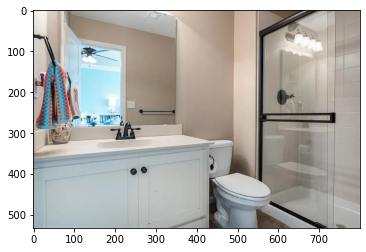

In [41]:
from matplotlib import pyplot as plt
import PIL
%matplotlib inline

filename = 'data/test_resized.jpg'
width = 800

im = PIL.Image.open(filename_raw)

aspect = im.size[0] / im.size[1]

im.thumbnail([width, int(width / aspect)], PIL.Image.ANTIALIAS)
im.save(filename, "JPEG")

plt.imshow(im)
plt.show()

In [42]:
from PIL import Image
import numpy as np

class ImageDeserializer(sagemaker.deserializers.BaseDeserializer):
    """Deserialize a PIL-compatible stream of Image bytes into a numpy pixel array"""
    def __init__(self, accept="image/png"):
        self.accept = accept

    @property
    def ACCEPT(self):
        return (self.accept,)

    def deserialize(self, stream, content_type):
        """Read a stream of bytes returned from an inference endpoint.
        Args:
            stream (botocore.response.StreamingBody): A stream of bytes.
            content_type (str): The MIME type of the data.
        Returns:
            mask: The numpy array of class labels per pixel
        """
        try:
            return np.array(Image.open(stream))
        finally:
            stream.close()


ss_predictor.deserializer = ImageDeserializer(accept="image/png")

In [43]:
ss_predictor.serializer = sagemaker.serializers.IdentitySerializer('image/jpeg')

with open(filename, 'rb') as imfile:
    imbytes = imfile.read()

# Extension exercise: Could you write a custom serializer which takes a filename as input instead?

In [44]:
cls_mask = ss_predictor.predict(imbytes)

print(type(cls_mask))
print(cls_mask.shape)

<class 'numpy.ndarray'>
(533, 800)


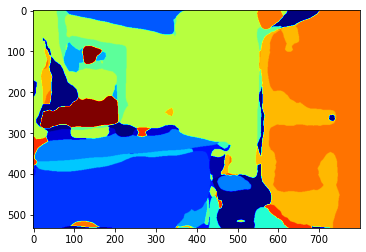

In [45]:
plt.imshow(cls_mask, cmap='jet')
plt.show()

In [50]:
import io
import tempfile

import mxnet as mx
from sagemaker.amazon.record_pb2 import Record


class SSProtobufDeserializer(sagemaker.deserializers.BaseDeserializer):
    """Deserialize protobuf semantic segmentation response into a numpy array"""
    def __init__(self, accept="application/x-protobuf"):
        self.accept = accept

    @property
    def ACCEPT(self):
        return (self.accept,)

    def deserialize(self, stream, content_type):
        """Read a stream of bytes returned from an inference endpoint.
        Args:
            stream (botocore.response.StreamingBody): A stream of bytes.
            content_type (str): The MIME type of the data.
        Returns:
            mask: The numpy array of class confidences per pixel
        """
        try:
            rec = Record()
            # mxnet.recordio can only read from files, not in-memory file-like objects, so we buffer the
            # response stream to a file on disk and then read it back:
            with tempfile.NamedTemporaryFile(mode='w+b') as ftemp:
                ftemp.write(stream.read())
                ftemp.seek(0)
                recordio = mx.recordio.MXRecordIO(ftemp.name, 'r')
                protobuf = rec.ParseFromString(recordio.read())
            values = list(rec.features["target"].float32_tensor.values)
            shape = list(rec.features["shape"].int32_tensor.values)
            # We 'squeeze' away extra dimensions introduced by the fact that the model can operate on batches
            # of images at a time:
            shape = np.squeeze(shape)
            mask = np.reshape(np.array(values), shape)
            return np.squeeze(mask, axis=0)
        finally:
            stream.close()


ss_predictor.deserializer = SSProtobufDeserializer()

In [49]:
!pip install mxnet

  Using cached mxnet-1.8.0.post0-py2.py3-none-manylinux2014_x86_64.whl (46.9 MB)
  Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)


In [51]:
prob_mask = ss_predictor.predict(imbytes)

print(type(prob_mask))
print(prob_mask.shape)

<class 'numpy.ndarray'>
(29, 533, 800)


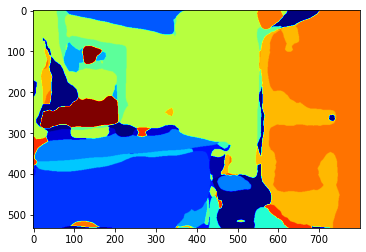

In [52]:
cls_mask_2 = np.argmax(prob_mask, axis=0)

plt.imshow(cls_mask_2, cmap='jet')
plt.show()

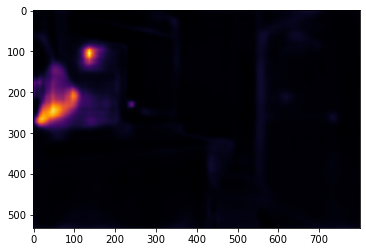

In [55]:
target_cls_id = 27  # (motorbike)
plt.imshow(prob_mask[target_cls_id, :, :], cmap='inferno')
plt.show()

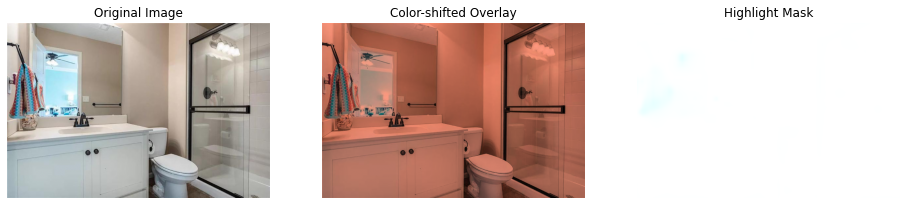

In [56]:
imarray = np.array(PIL.Image.open(filename)) / 255.0  # Convert image pixels from 0-255 to 0-1
hilitecol = np.array((0., 1., 1., 1.))  # Cyan, 100% opacity (RGBAlpha 0-1 range)

# Red-shift our image to make the cyan highlights more obvious:
imshifted = imarray.copy()
imshifted[:, :, 1] *= 0.6
imshifted[:, :, 2] *= 0.5

# Construct a mask with alpha channel taken from the model result:
hilitemask = np.tile(hilitecol[np.newaxis, np.newaxis, :], list(imarray.shape[:2]) + [1])
hilitemask[:, :, 3] = prob_mask[target_cls_id, :, :]

# Overlay the two images:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6))

ax0.imshow(imarray)
ax0.axis("off")
ax0.set_title("Original Image")
ax2.imshow(hilitemask)
ax2.axis("off")
ax2.set_title("Highlight Mask")

ax1.imshow(imshifted)
ax1.imshow(hilitemask)
ax1.axis("off")
ax1.set_title("Color-shifted Overlay")

plt.show()

In [57]:
ss_predictor.delete_endpoint()